In [1]:
# let us first import the libraries
# local import for convinience
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm

def print_performance_metrics(supplychainnet):
    for key, value in supplychainnet.items():
        print(f"{key}: {value}")

nodes: {'S1': Supplier 1, 'D1': Distributor1}
links: {'L1': S1 to D1}
demands: {'d1': Demand1}
env: <simpy.core.Environment object at 0x00000212BA80D5D0>
num_of_nodes: 2
num_of_links: 1
num_suppliers: 1
num_manufacturers: 0
num_distributors: 1
num_retailers: 0
total_available_inv: 500
avg_available_inv: 354.83870967741933
total_inv_carry_cost: 2214.0000000000055
total_inv_spend: 1760000
total_transport_cost: 1050
total_revenue: 2325000
total_cost: 1763264.0
total_profit: 561736.0
total_demand_by_customers: [104, 10400]
total_fulfillment_received_by_customers: [87, 8700]
total_demand_by_site: [12, 9600]
total_fulfillment_received_by_site: [11, 8800]
total_demand: [116, 20000]
total_fulfillment_received: [98, 17500]
total_shortage: [11, 1100]
avg_cost_per_order: 15200.551724137931
avg_cost_per_item: 88.1632


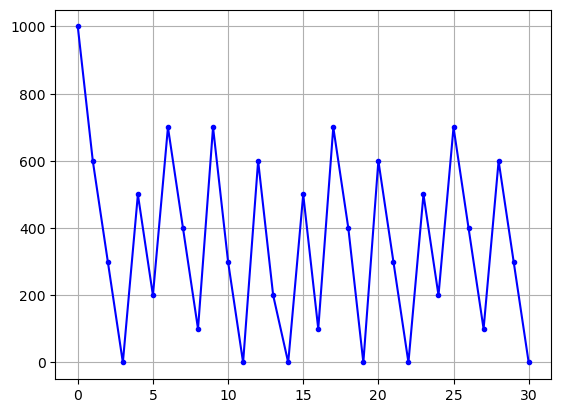

In [5]:
"""
Testing replenishment policies with a simple supply chain network
"""

import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor1', node_type='distributor', capacity=1400, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.RQReplenishment, policy_param={'R':500,'Q':800}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 2)
demand1 = scm.Demand(env=env, ID='d1', name='Demand1', order_arrival_model=lambda: 0.3, order_quantity_model=lambda:100, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
#demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
#                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
scm.global_logger.disable_logging()
supplynet = scm.create_sc_net(env=env,nodes=[supplier,distributor],links=[link1],demands=[demand1])
supplynet = scm.simulate_sc_net(supplynet, sim_time=31)
print_performance_metrics(supplynet)

import numpy as np
import matplotlib.pyplot as plt
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()

INFO Distributor1 - 0.0000:D1: Inventory levels:10
INFO Demand2 - 0.0000:d2:Customer1:Order quantity:1, available.
INFO Distributor1 - 1.0000:D1: Inventory levels:9
INFO Demand2 - 1.0000:d2:Customer2:Order quantity:1, available.
INFO Demand2 - 2.0000:d2:Customer1:Order quantity:1 received.
INFO Distributor1 - 2.0000:D1: Inventory levels:8
INFO Demand2 - 2.0000:d2:Customer3:Order quantity:1, available.
INFO Demand2 - 3.0000:d2:Customer2:Order quantity:1 received.


INFO Distributor1 - 3.0000:D1: Inventory levels:7
INFO Demand2 - 3.0000:d2:Customer4:Order quantity:1, available.
INFO Demand2 - 4.0000:d2:Customer3:Order quantity:1 received.
INFO Distributor1 - 4.0000:D1: Inventory levels:6
INFO Demand2 - 4.0000:d2:Customer5:Order quantity:1, available.
INFO Demand2 - 5.0000:d2:Customer4:Order quantity:1 received.
INFO Distributor1 - 5.0000:D1: Inventory levels:5
INFO Distributor1 - 5.0000:D1:Replenishing inventory from supplier:Factory1, order placed for 10 units.
INFO Demand2 - 5.0000:d2:Customer6:Order quantity:1, available.
INFO Demand2 - 6.0000:d2:Customer5:Order quantity:1 received.
INFO Distributor1 - 6.0000:D1: Inventory levels:4
INFO Demand2 - 6.0000:d2:Customer7:Order quantity:1, available.
INFO Demand2 - 7.0000:d2:Customer6:Order quantity:1 received.
INFO Distributor1 - 7.0000:D1: Inventory levels:3
INFO Demand2 - 7.0000:d2:Customer8:Order quantity:1, available.
INFO Demand2 - 8.0000:d2:Customer7:Order quantity:1 received.
INFO Distributor

nodes: {'S1': Supplier1, 'F1': Factory1, 'D1': Distributor1}
links: {'L1': S1 to F1}
demands: {'d2': Demand2}
env: <simpy.core.Environment object at 0x0000028BF609B510>
num_of_nodes: 3
num_of_links: 1
num_suppliers: 1
num_manufacturers: 1
num_distributors: 1
num_retailers: 0
total_available_inv: 877
avg_available_inv: 409.51612903225805
total_inv_carry_cost: 382.02000000000004
total_inv_spend: 382
total_transport_cost: 230
total_revenue: 1572
total_cost: 1364.02
total_profit: 207.98000000000002
total_demand_by_customers: [31, 31]
total_fulfillment_received_by_customers: [20, 20]
total_demand_by_site: [4, 52]
total_fulfillment_received_by_site: [3, 42]
total_demand: [35, 83]
total_fulfillment_received: [23, 62]
total_shortage: [14, 37]
avg_cost_per_order: 38.972
avg_cost_per_item: 16.433975903614456


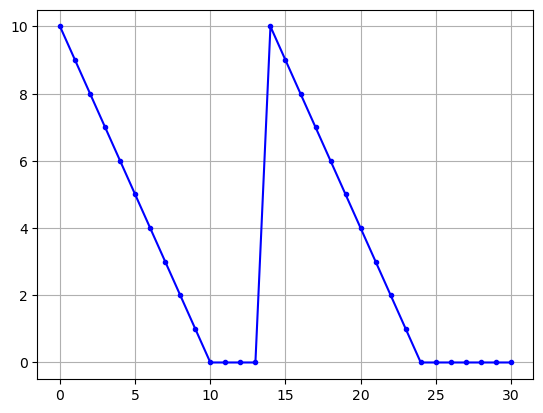

In [ ]:
"""
Testing for bugs and errors
"""

import simpy
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="rm1", name="raw1", extraction_quantity=30, extraction_time=1, mining_cost=0.1,cost=1)
supplier = scm.Supplier(env=env, ID='S1', name='Supplier1', node_type='supplier',capacity=2000,inventory_holding_cost=0.02,
                        raw_material=raw_mat,logging=False)
product = scm.Product(ID='P1', name='Product1', manufacturing_cost=20, manufacturing_time=1,sell_price=50,
                      raw_materials = [(raw_mat,1)], batch_size=1)
factory = scm.Manufacturer(env=env, ID='F1', name='Factory1', capacity=20, initial_level=5, inventory_holding_cost=0.1,
                           product_sell_price=50, replenishment_policy=scm.SSReplenishment, policy_param={'s':5,'S':20},
                           product =product, logging=False)
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor1', node_type='distributor', capacity=15, initial_level=10, 
                                inventory_holding_cost=1, replenishment_policy=scm.SSReplenishment, logging=True,
                                policy_param={'s':5,'S':15,'period':1}, 
                                product_sell_price=52, product_buy_price=35)
link1 = scm.Link(env=env, ID='L1', source=supplier, sink=factory, cost=10, lead_time=lambda: 2)
link2 = scm.Link(env=env, ID='L2', source=factory, sink=distributor, cost=5, lead_time=lambda: 1)
demand2 = scm.Demand(env=env, ID='d2', name='Demand2', order_arrival_model=lambda: 1, order_quantity_model=lambda:1, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2, logging=True)

scm.global_logger.enable_logging()
import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env,nodes=[supplier,factory,distributor],links=[link1],demands=[demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=31)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

Performance Metrics:
Total Available Inventory: 100
Average Available Inventory: 205.08474576271186
Total Inventory Carry Cost: 2420.0
Total Inventory Spend: 1120000
Total Transport Cost: 750
Total Revenue: 1500000
Total Cost: 1123160.0
Total Profit: 376840.0
Total Demand Placed by Customers: [60, 6000]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [15, 6000]
Total Fulfillment Received by Site: [14, 5600]
Total Demand Placed: [75, 12000]
Total Fulfillment Received: [72, 11400]
Average Cost per Order: 14975.466666666667
Average Cost per Item: 93.59666666666666


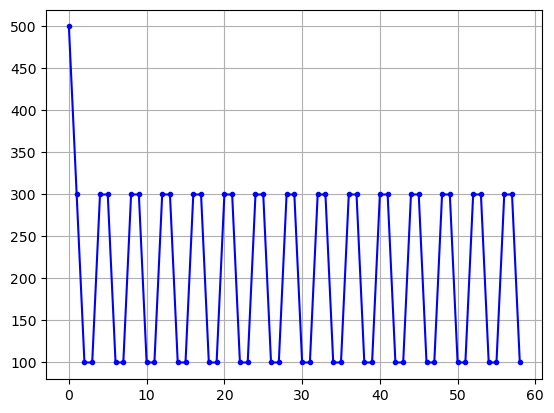

In [ ]:
"""
Testing supplier selection policies with multiple suppliers
"""

import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
supplier2 = scm.Supplier(env=env, ID='S2', name='Supplier 2', node_type='infinite_supplier')
supplier3 = scm.Supplier(env=env, ID='S3', name='Supplier 3', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=500, initial_level=500, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.SSReplenishment, 
                                policy_param={'s':200,'S':500, 'selection_policy':'cheapest', 'selection_mode':'fixed'}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 3)
link2  = scm.Link(env=env, ID='L2', source=supplier, sink=distributor, cost=20, lead_time=lambda: 2)
link3  = scm.Link(env=env, ID='L3', source=supplier, sink=distributor, cost=30, lead_time=lambda: 1)
demand1 = scm.Demand(env=env, ID='d1', name='Demand 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
demand2 = scm.Demand(env=env, ID='d2', name='Demand 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
scm.global_logger.disable_logging()

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env, nodes=[supplier,distributor],links=[link1],demands=[demand1,demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=59)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)